In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
np.random.seed(44)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [350]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 4 - Unbalanced

06/01/2023  02:07 PM    <DIR>          .
06/01/2023  02:07 PM    <DIR>          ..
05/20/2023  06:05 PM    <DIR>          .ipynb_checkpoints
08/30/2022  04:01 PM           561,600 Bank Customer Churn Prediction.csv
06/01/2023  02:07 PM         1,720,138 Code.ipynb
               2 File(s)      2,281,738 bytes
               3 Dir(s)  21,324,226,560 bytes free


In [351]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [352]:
data = data.drop('customer_id',axis=1)

In [353]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our dataset")

There are 10000 Rows and 11 Columns in our dataset


In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [355]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [356]:
data.describe(include='all')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [357]:
# mutlicolinearity 
# statis

In [358]:
# data = pd.concat([class_1,class_0],axis=0).sample(frac=1).reset_index(drop=True)
# data.head()

In [359]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [360]:
print(f"Number of duplicated Values is {data.duplicated().sum()}")

Number of duplicated Values is 0


In [361]:
data.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [362]:
def count_plot(col,title):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.show()
def multi_count_plot(col,col2,title=""):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col,hue=col2)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
def barplot_mean(col,title):
    plt.figure(figsize=(10,6))
    sns.barplot(x=data.groupby('churn')[col].mean().index,
                y=data.groupby('churn')[col].mean().values)
    plt.title(title)
    plt.show()
def approved_vs_not(col,Limit=5):
    fig,ax = plt.subplots(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title('Approved')
    positive = data[data['churn']==1]
    plt.pie(positive[col].value_counts()[:Limit],labels=
        positive[col].value_counts()[:Limit].index,
           autopct='%1.1f%%')
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    negative = data[data['churn']==0]
    plt.pie(negative[col].value_counts()[:Limit],labels=
        negative[col].value_counts()[:Limit].index,
        autopct ='%1.2f%%' )
    plt.show()   
            

## Target Column

In [363]:
import plotly.express as px 

In [364]:
px.bar(x=data['churn'].value_counts().index , y =data['churn'].value_counts().values )

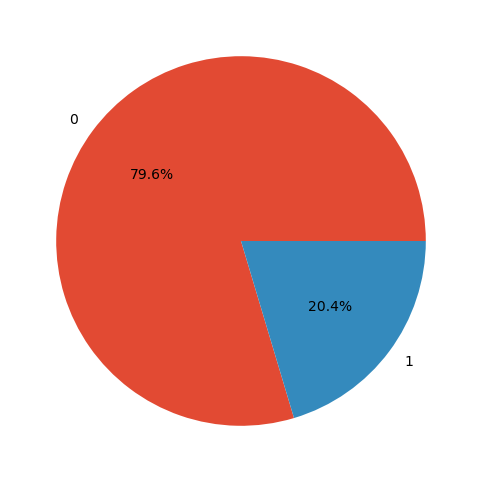

In [365]:
pie_plot('churn')

In [366]:
data.groupby('churn').mean()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [367]:
# data.groupby('churn').median()

In [368]:
def get_insights(column):
    print(f"### Columns in {column} its type is {data[column].dtype}")
    print("\n### most appeared values ")
    print(data[column].value_counts().index[:5].values)
    print(f"\n### Number of unique values is \n{data[column].nunique()} ")
    print('\n#### Random Values ####')
    print(data.sample(5)[column].values)

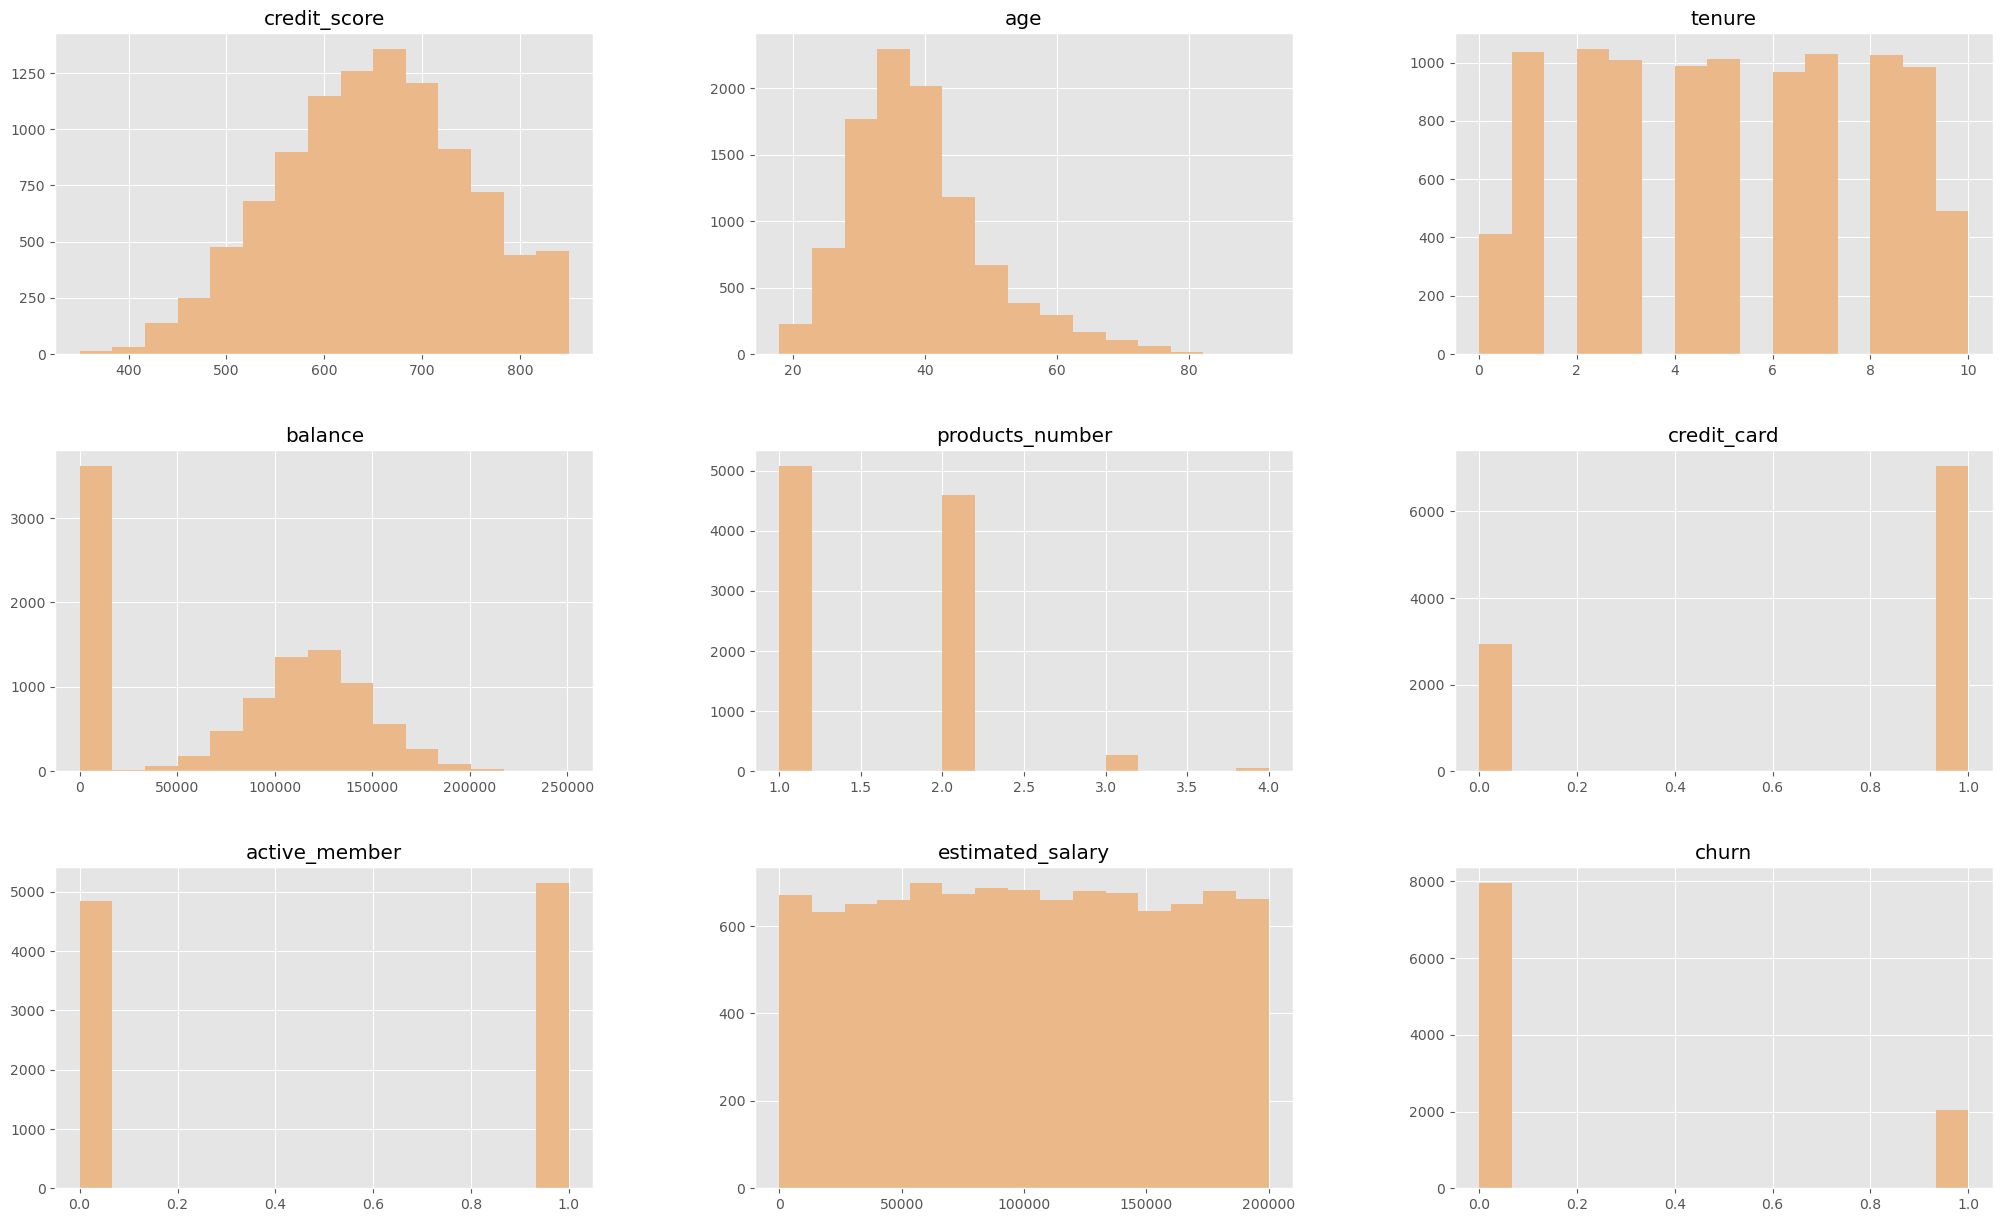

In [369]:
color = '#eab889'
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

In [370]:
get_insights('credit_score')

### Columns in credit_score its type is int64

### most appeared values 
[850 678 655 705 667]

### Number of unique values is 
460 

#### Random Values ####
[594 705 560 588 663]


In [371]:
data['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

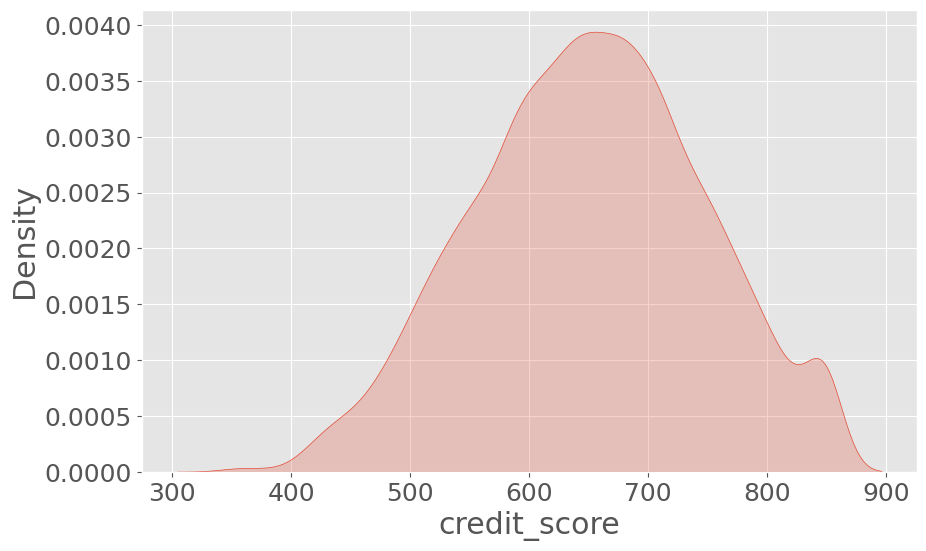

In [372]:
kde_plot('credit_score')

In [373]:
def convert_credit(credit_score):
    if credit_score >= 800 and credit_score <= 850:
        rating = "Excellent"
    elif credit_score >= 740 and credit_score <= 799:
        rating = "Very good"
    elif credit_score >= 670 and credit_score <= 739:
        rating = "Good"
    elif credit_score >= 580 and credit_score <= 669:
        rating = "Fair"
    elif credit_score >= 300 and credit_score <= 579:
        rating = "Poor"
    else:
        rating = "Invalid credit score"
    
    return rating

In [374]:
data['credit_categorical'] = data['credit_score'].apply(convert_credit)

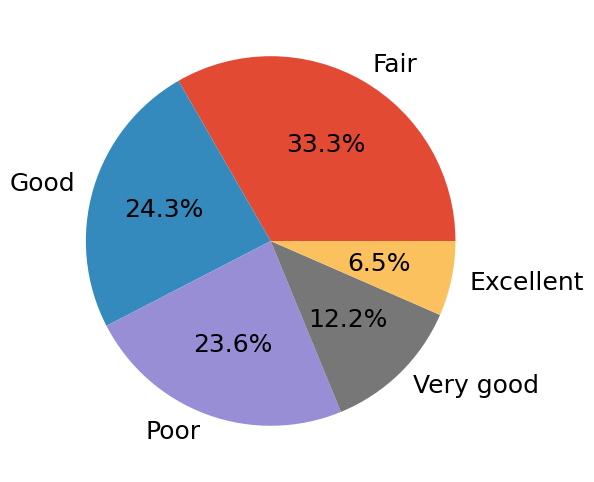

In [375]:
pie_plot('credit_categorical')

In [376]:
get_insights('country')

### Columns in country its type is object

### most appeared values 
['France' 'Germany' 'Spain']

### Number of unique values is 
3 

#### Random Values ####
['France' 'Germany' 'Germany' 'France' 'Germany']


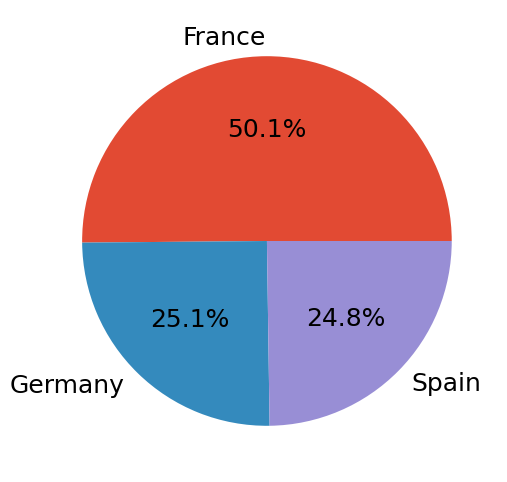

In [377]:
pie_plot('country',"The count of Each country")

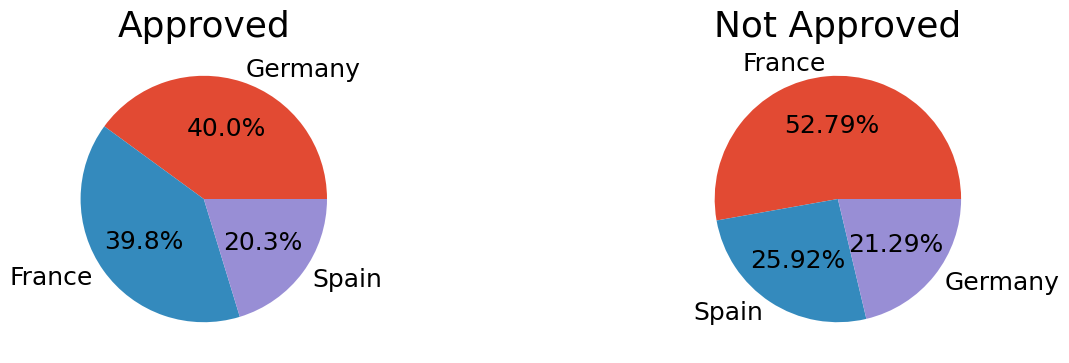

In [378]:
approved_vs_not('country')

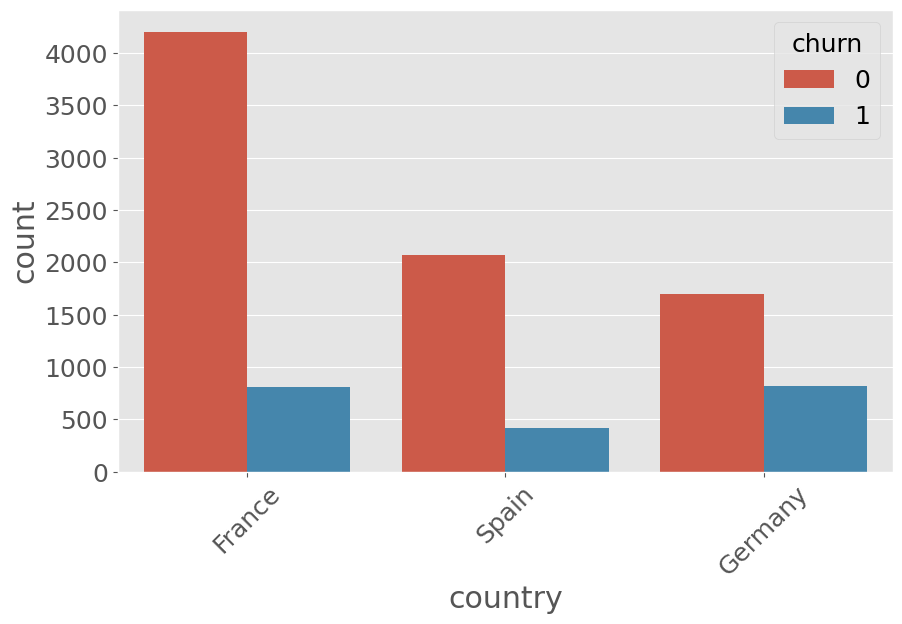

In [379]:
multi_count_plot('country','churn')

### gender

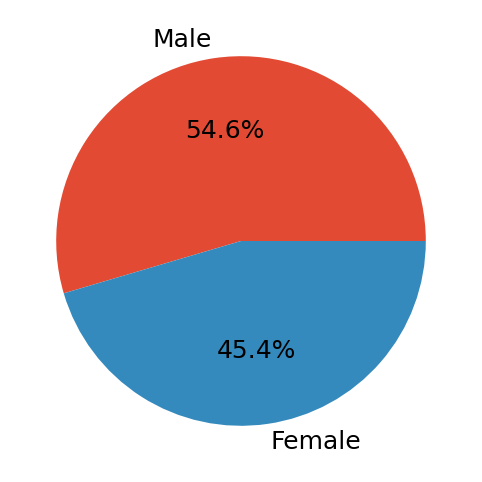

In [380]:
pie_plot('gender')

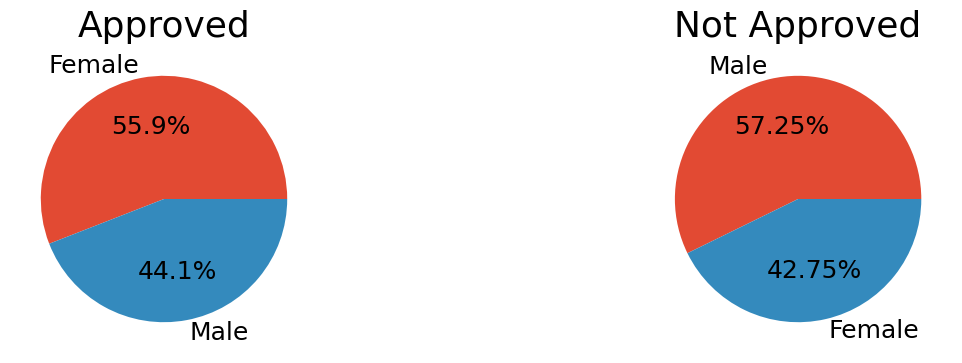

In [381]:
approved_vs_not('gender')

### age

In [382]:
get_insights("age")

### Columns in age its type is int64

### most appeared values 
[37 38 35 36 34]

### Number of unique values is 
70 

#### Random Values ####
[38 47 46 25 35]


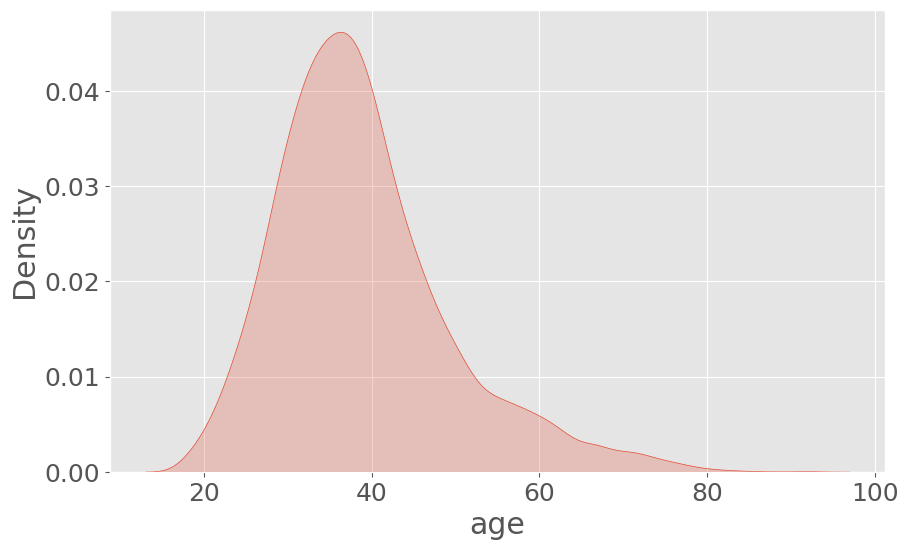

In [383]:
kde_plot('age')

In [384]:
# data['age'] = data['age'].apply(lambda x:np.log(x))

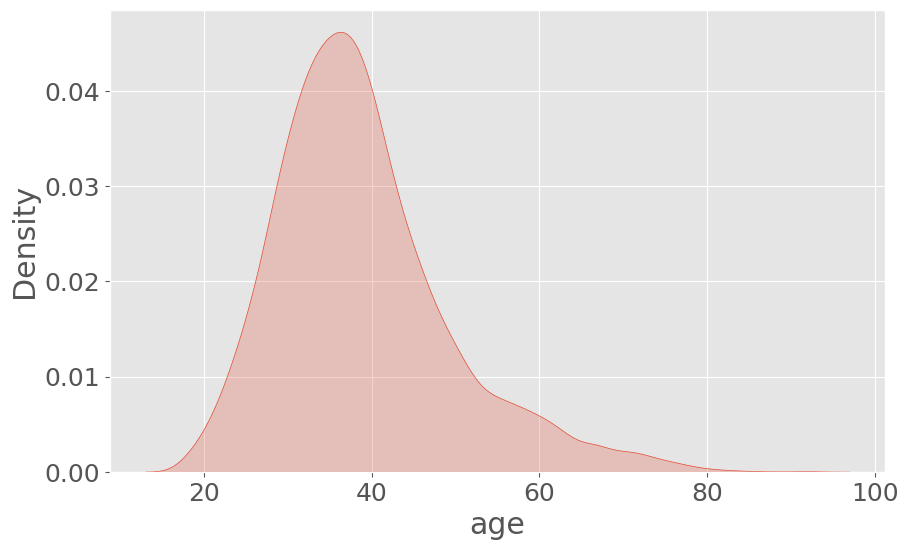

In [385]:
kde_plot('age')

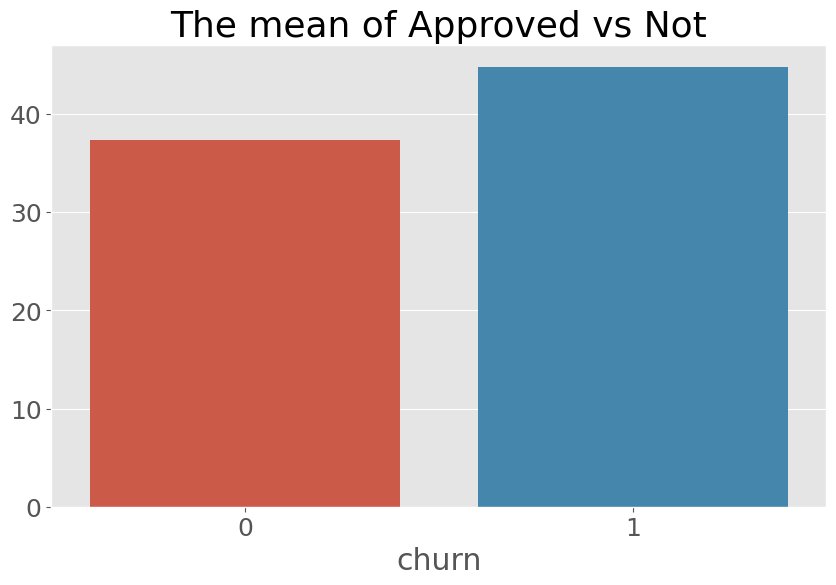

In [386]:
barplot_mean('age',"The mean of Approved vs Not")

### tenure

In [387]:
get_insights('tenure')

### Columns in tenure its type is int64

### most appeared values 
[2 1 7 8 5]

### Number of unique values is 
11 

#### Random Values ####
[8 1 7 1 8]


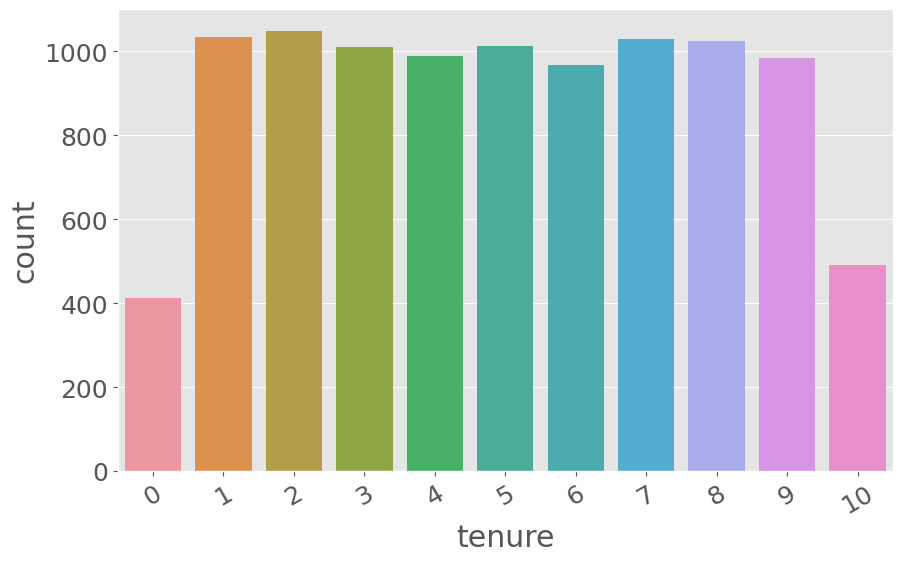

In [388]:
count_plot('tenure',"")

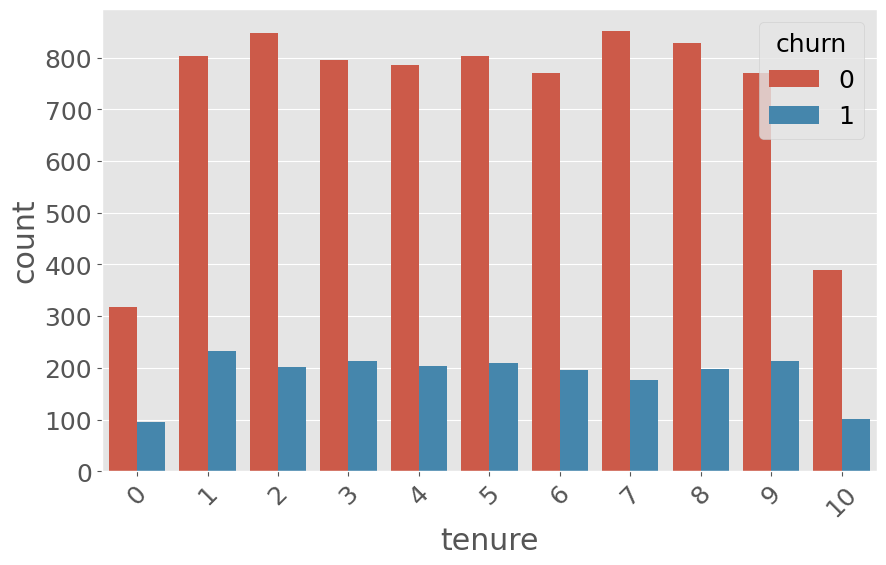

In [389]:
multi_count_plot('tenure','churn')

In [390]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'credit_categorical'],
      dtype='object')

### balance

In [391]:
get_insights('balance')

### Columns in balance its type is float64

### most appeared values 
[     0.   130170.82 105473.74  85304.27 159397.75]

### Number of unique values is 
6382 

#### Random Values ####
[139979.07  81710.46      0.   107316.09      0.  ]


In [392]:
data['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

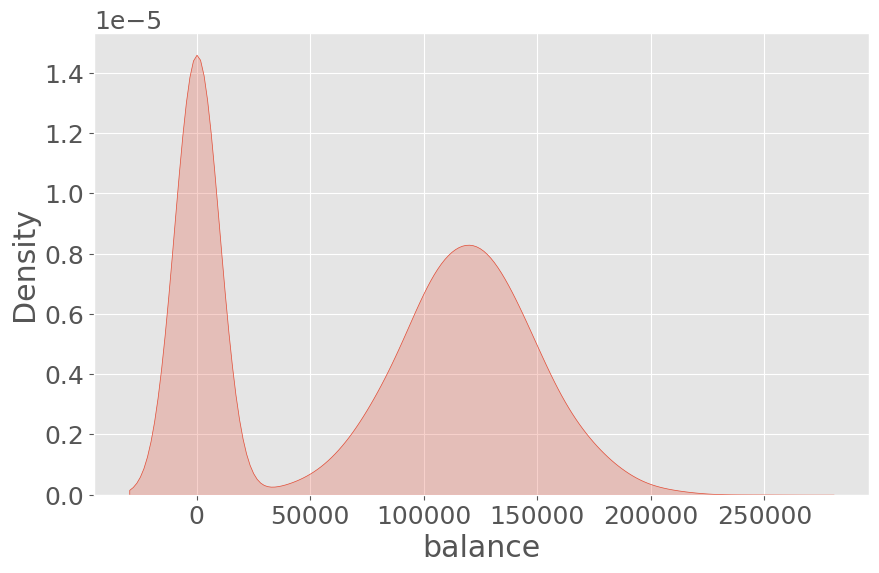

In [393]:
kde_plot('balance')

In [394]:
get_insights('products_number')

### Columns in products_number its type is int64

### most appeared values 
[1 2 3 4]

### Number of unique values is 
4 

#### Random Values ####
[1 2 2 2 1]


In [395]:
# data['products_number'] = data['products_number'].astype(str)

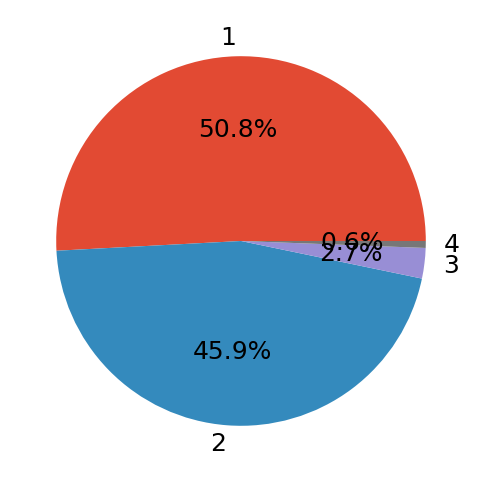

In [396]:
pie_plot('products_number')

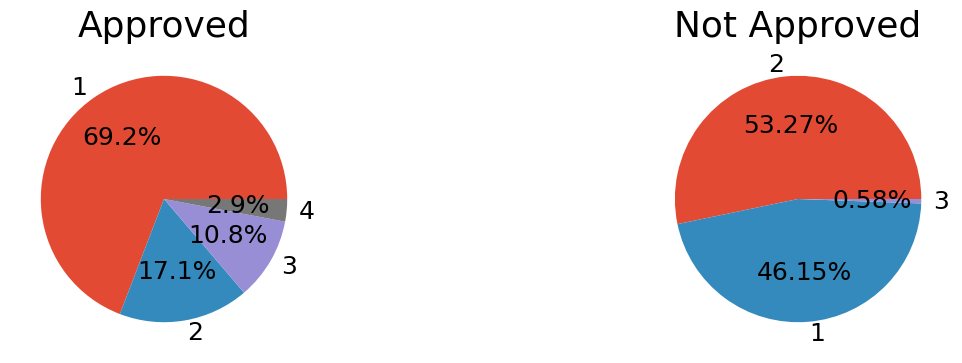

In [397]:
approved_vs_not('products_number')

In [398]:
get_insights('credit_card')

### Columns in credit_card its type is int64

### most appeared values 
[1 0]

### Number of unique values is 
2 

#### Random Values ####
[0 1 1 1 0]


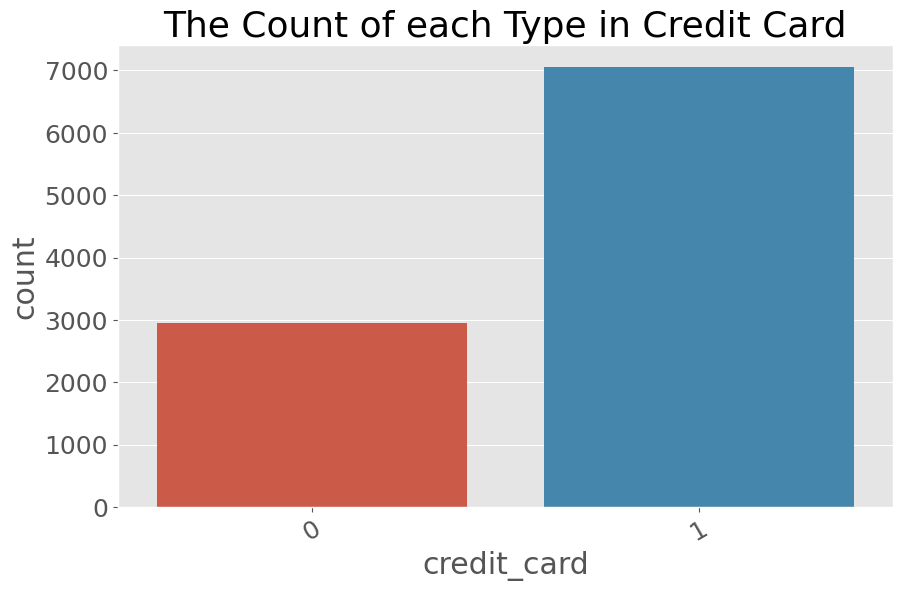

In [399]:
count_plot('credit_card',"The Count of each Type in Credit Card")

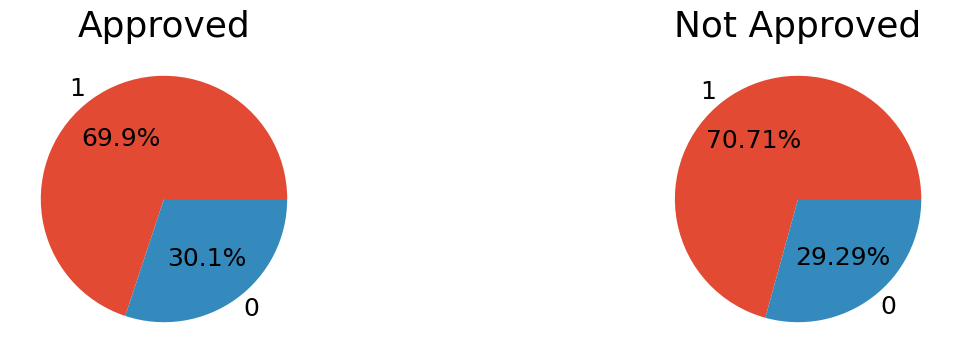

In [400]:
approved_vs_not('credit_card')

In [401]:
get_insights('active_member')

### Columns in active_member its type is int64

### most appeared values 
[1 0]

### Number of unique values is 
2 

#### Random Values ####
[0 0 1 1 1]


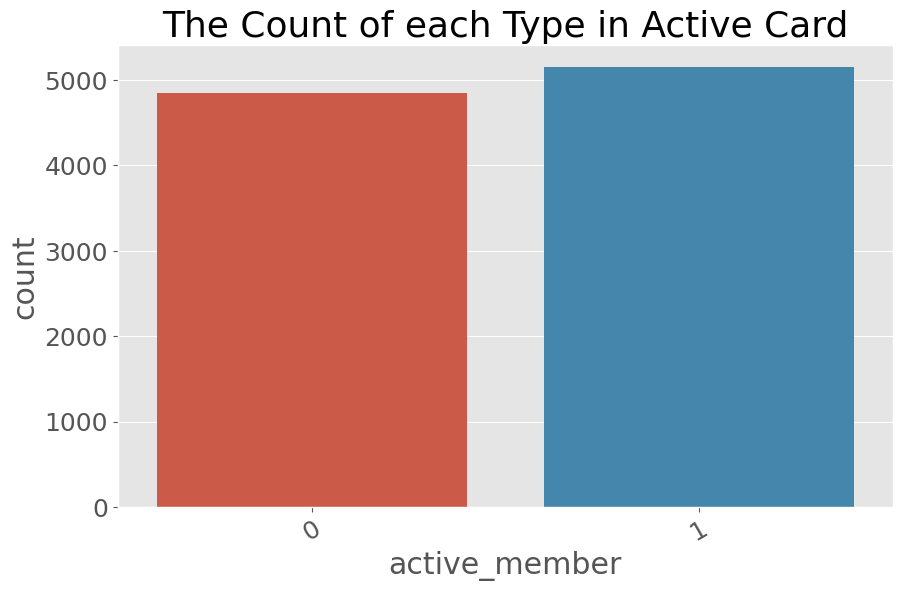

In [402]:
count_plot('active_member',"The Count of each Type in Active Card")

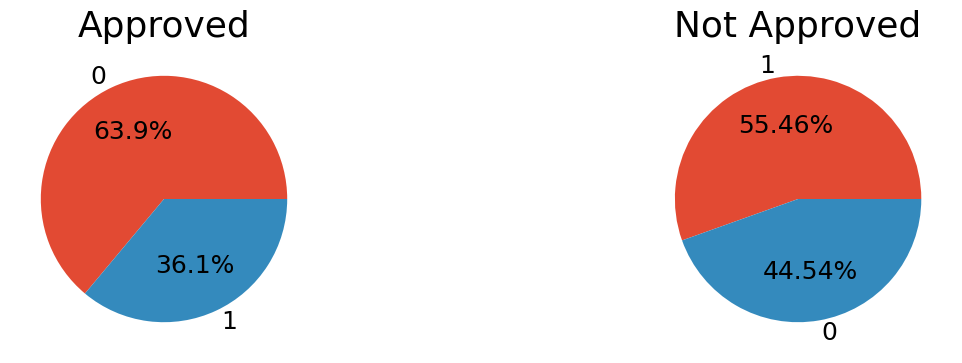

In [403]:
approved_vs_not('active_member')

In [404]:
get_insights('estimated_salary')

### Columns in estimated_salary its type is float64

### most appeared values 
[ 24924.92 101348.88  55313.44  72500.68 182692.8 ]

### Number of unique values is 
9999 

#### Random Values ####
[151460.84 181297.65 162347.05 153157.97  81062.93]


In [405]:
data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

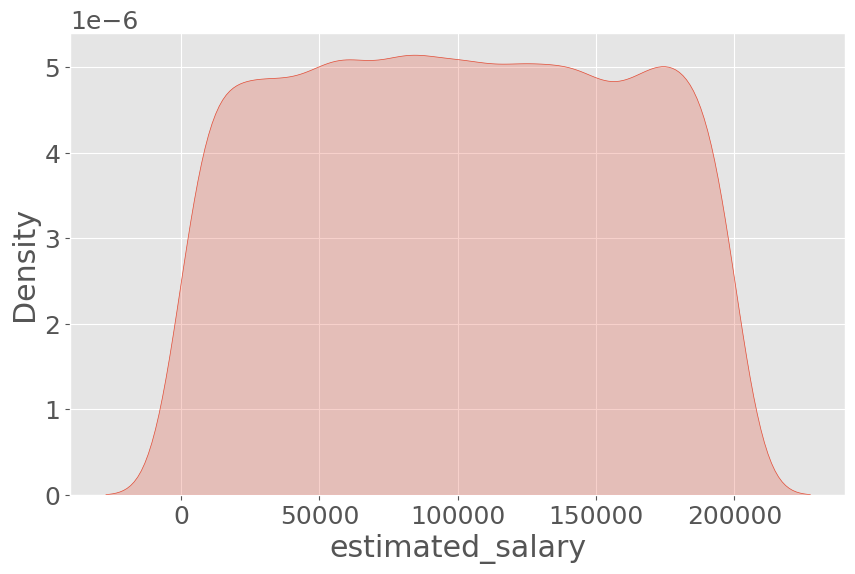

In [406]:
kde_plot('estimated_salary')

In [407]:
# data['estimated_salary'] = data['estimated_salary'].apply(lambda x:np.log(x))

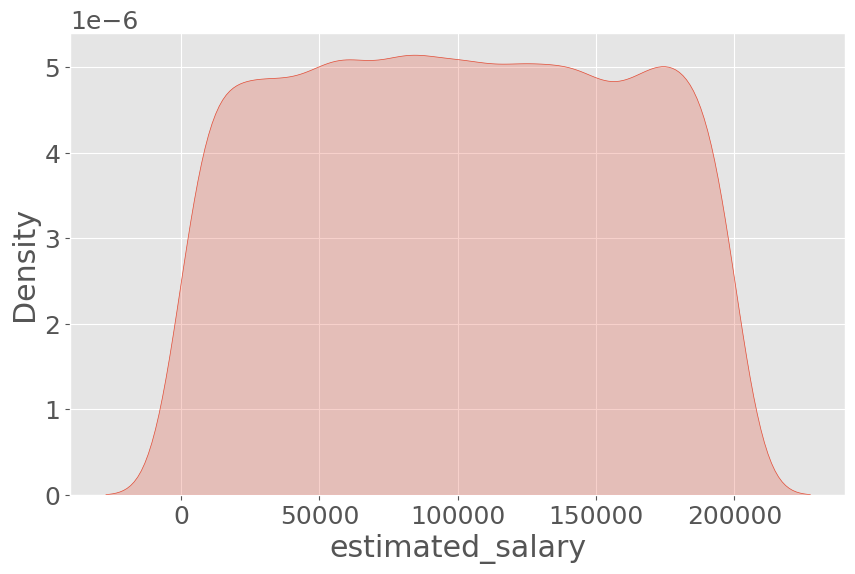

In [408]:
kde_plot('estimated_salary')

## Explantory Data analysis

In [409]:
def bar_mean(data_mean,col,title):
    plt.figure(figsize=(10,6))
    plt.bar(x=data_mean[col].index, height = data_mean[col].values)
    plt.title(title)
    plt.show()

In [410]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_categorical
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [411]:
country_mean = data.groupby('country').mean()
country_mean

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
country,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


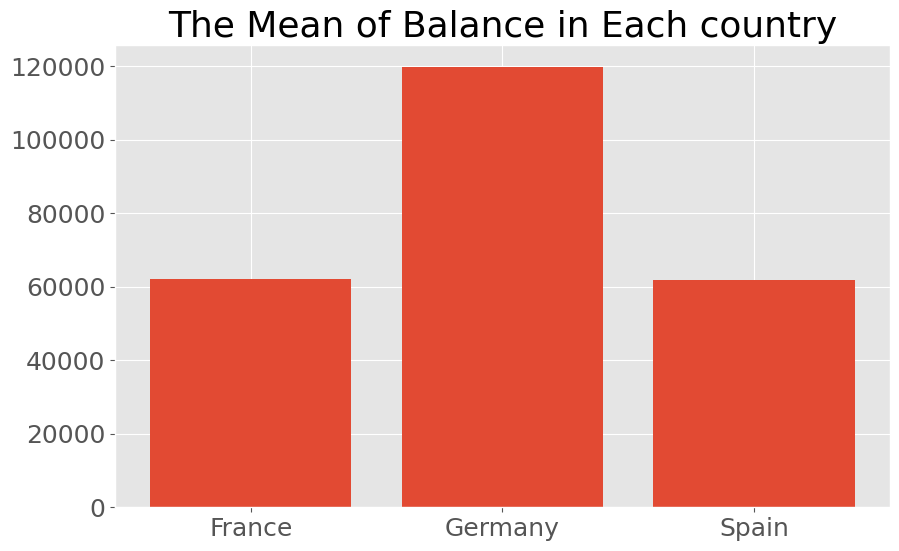

In [412]:
bar_mean(country_mean,'balance','The Mean of Balance in Each country')

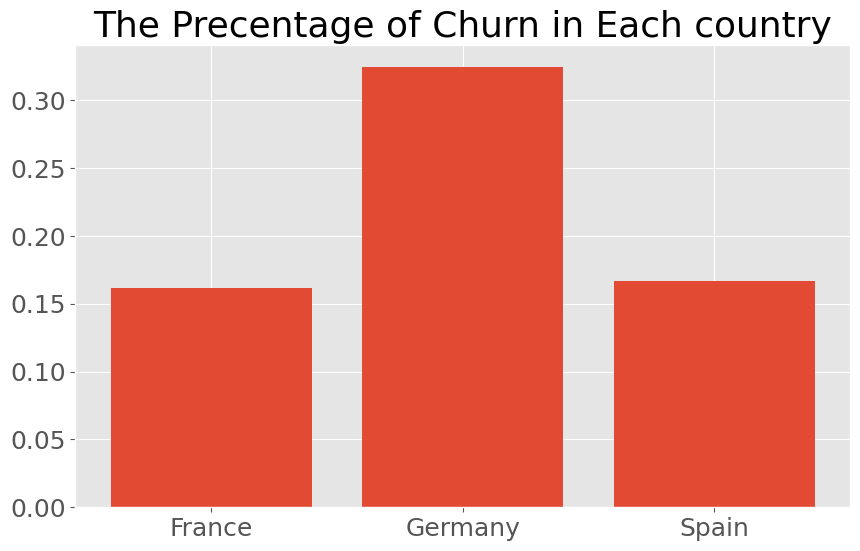

In [413]:
bar_mean(country_mean,'churn','The Precentage of Churn in Each country')

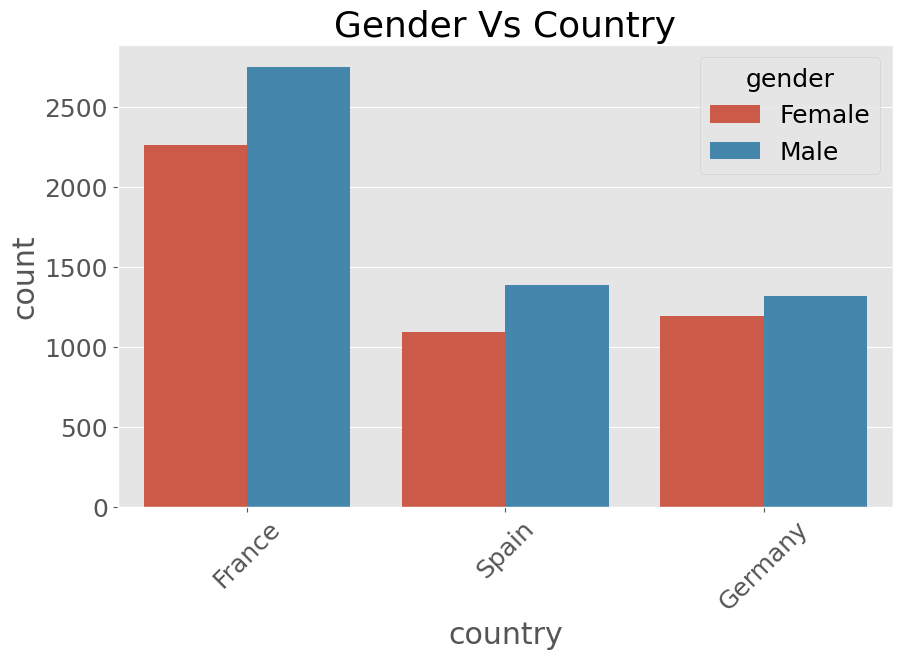

In [414]:
multi_count_plot('country','gender',"Gender Vs Country")

In [415]:
gender_mean = data.groupby('gender').mean()
gender_mean

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


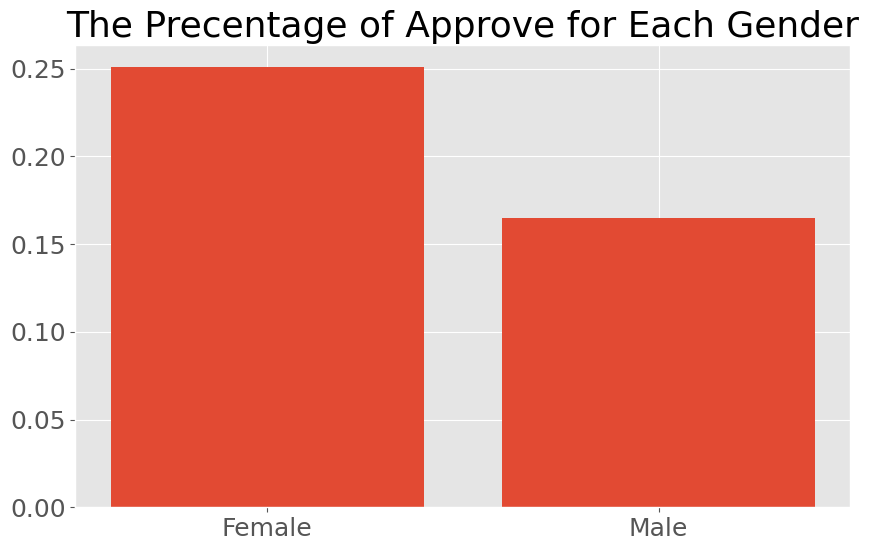

In [416]:
bar_mean(gender_mean,'churn','The Precentage of Approve for Each Gender')

In [417]:
tenure_mean = data.groupby('tenure').mean()
tenure_mean

,credit_score,age,balance,products_number,credit_card,active_member,estimated_salary,churn
tenure,,,,,,,,
0,652.043584,39.186441,79878.910630,1.443099,0.648910,0.530266,102374.579128,0.230024
1,648.806763,39.428986,78555.384222,1.489855,0.677295,0.549758,100468.618957,0.224155
2,652.832061,39.058206,76839.626469,1.589695,0.704198,0.534351,98312.359857,0.191794
3,650.530228,39.028741,77668.059881,1.533201,0.723489,0.519326,97667.196283,0.211100
4,651.502528,38.239636,74059.394065,1.516684,0.716886,0.505561,99867.777826,0.205258
5,650.527668,39.287549,76444.280860,1.554348,0.691700,0.500000,101286.009644,0.206522
6,647.380558,38.862461,74403.942637,1.519131,0.717684,0.516029,99168.733154,0.202689
7,649.606031,38.367704,75551.634426,1.530156,0.706226,0.520428,101257.240370,0.172179
8,647.749268,38.450732,77936.598254,1.522927,0.723902,0.506341,101072.102937,0.192195


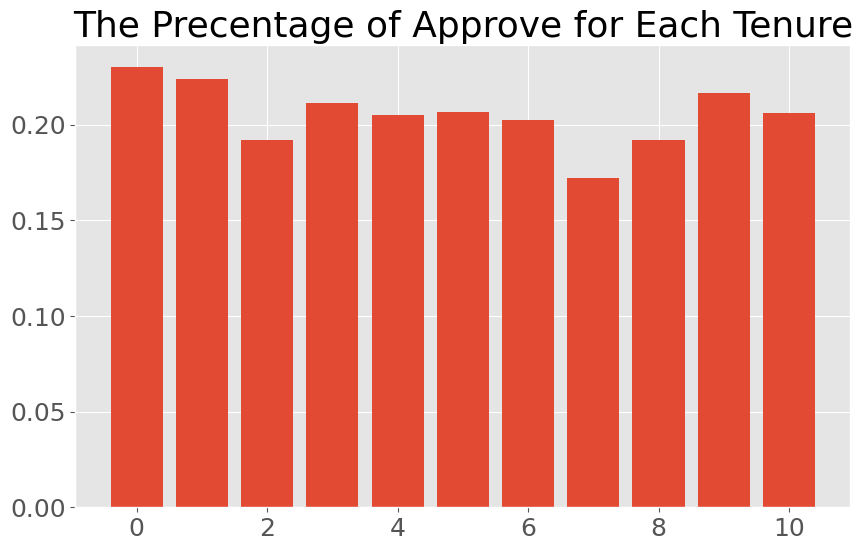

In [418]:
bar_mean(tenure_mean,'churn','The Precentage of Approve for Each Tenure')

In [419]:
active_memberMean = data.groupby('active_member').mean()
active_memberMean

,credit_score,age,tenure,balance,products_number,credit_card,estimated_salary,churn
active_member,,,,,,,,
0,647.973603,37.997938,5.097340,77134.376863,1.524438,0.711074,100767.203854,0.268509
1,652.934188,39.791497,4.933217,75875.422145,1.535624,0.700252,99452.965894,0.142691


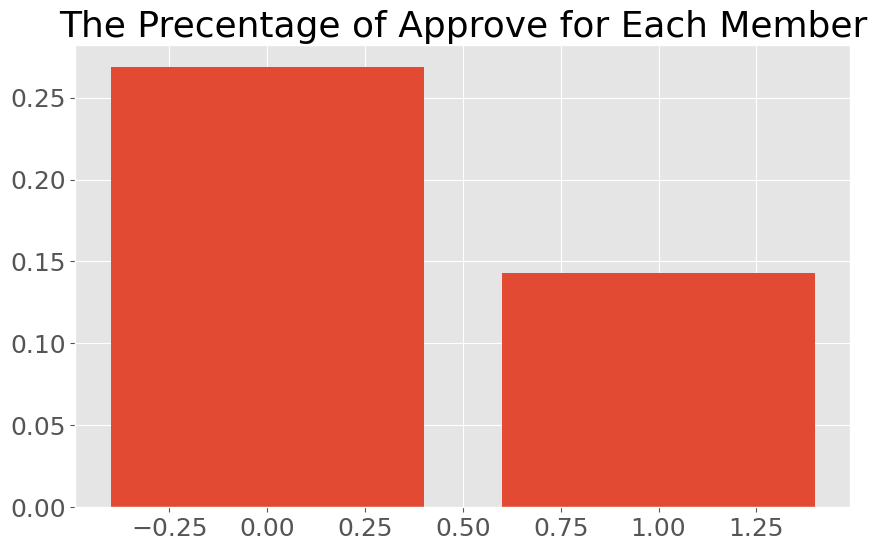

In [420]:
bar_mean(active_memberMean,'churn','The Precentage of Approve for Each Member')

## Model Building

In [421]:
data.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


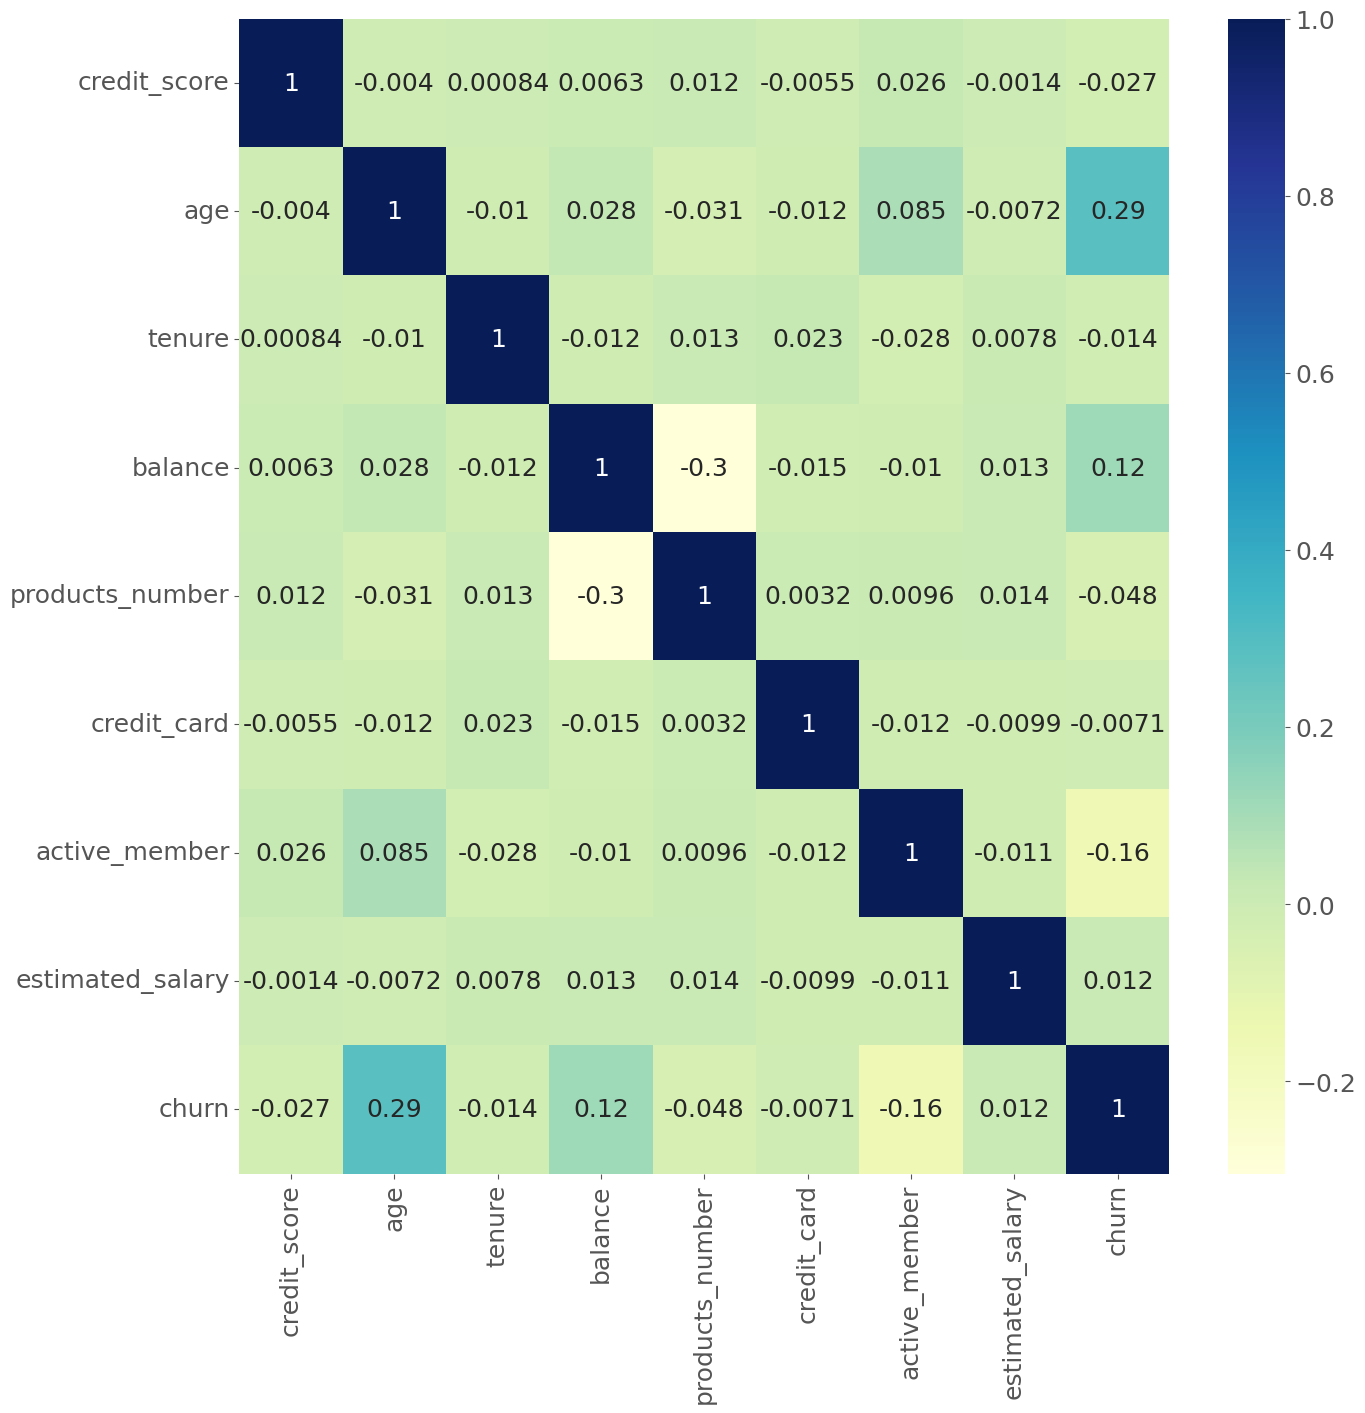

In [422]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

## Preprocessing

In [423]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_categorical
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [424]:
X = data.drop(['churn','credit_categorical'],axis=1)
Y = data['churn'].values

In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [426]:
X.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [427]:
numerical = [col for col in X.columns if data[col].dtype != "O"]
numerical

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

In [428]:
categorical = [col for col in X.columns if data[col].dtype == "O"]
categorical

['country', 'gender']

In [429]:
for col in categorical:
    print(col + " has : " + str(X[col].nunique()))

country has : 3
gender has : 2


In [430]:
X = pd.get_dummies(X,drop_first=True)
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [431]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0       credit_score  21.236445
1                age  12.334128
2             tenure   3.872755
3            balance   3.182267
4    products_number   7.826417
5        credit_card   3.289605
6      active_member   2.075966
7   estimated_salary   3.887186
8    country_Germany   1.787170
9      country_Spain   1.486247
10       gender_Male   2.168988


In [432]:
X = X.drop(['credit_score','age'],axis=1)

In [433]:
x_train, x_test,y_train,y_test = train_test_split(X ,Y ,test_size= .15,random_state=42,stratify=Y)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((8500, 9), (1500, 9), (8500,), (1500,))

In [434]:
x_train

,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
6918,0,108058.07,2,1,1,187826.11,0,1,1
4171,6,0.00,1,0,0,7819.76,0,0,0
6258,2,133009.51,1,1,0,126809.15,0,0,0
875,9,117301.66,1,0,0,182025.95,0,0,0
5728,10,0.00,2,1,1,146257.77,0,0,1
...,...,...,...,...,...,...,...,...,...
6423,8,115144.68,1,1,0,188905.43,0,1,1
2517,2,104702.65,2,1,0,107948.72,1,0,1
1683,5,0.00,1,1,1,159808.95,0,0,1
6081,8,93590.47,1,0,1,21228.71,0,0,1


In [435]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [436]:
overSampler = SMOTE(sampling_strategy='minority',random_state=123)

In [437]:
x_train,y_train = overSampler.fit_resample(x_train,y_train)
x_train.shape,y_train.shape

((13538, 9), (13538,))

In [438]:
list(y_train).count(0) , list(y_train).count(1)

(6769, 6769)

In [439]:
scaler = StandardScaler()

In [440]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [441]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [442]:
class_weight = {}

In [443]:
models = {"Naive" : GaussianNB(),"Logistic Regression" : LogisticRegression(),
          "Gradient Boosting" : GradientBoostingClassifier(),
          "XGB" : XGBClassifier(),
         "RF" : RandomForestClassifier(),"SVM" : SVC(),
          "Decision Tree" : DecisionTreeClassifier()
         }

In [444]:
for name , model in models.items():
    print(f"\n\n ### Model name is : {name}  ####")
    model.fit(x_train, y_train)
    print(f"\n Model Score on test set {model.score(x_test,y_test)} \n")
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    y_train_pred = model.predict(x_train)
    print(f"F1 Score for training is {f1_score(y_train_pred,y_train)}")
    print("F1 Score for testing  ")
    print(f1_score(y_test,y_pred))
    print("\n" + "-" * 30)



 ### Model name is : Naive  ####

 Model Score on test set 0.6633333333333333 

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1194
           1       0.31      0.55      0.40       306

    accuracy                           0.66      1500
   macro avg       0.58      0.62      0.58      1500
weighted avg       0.75      0.66      0.69      1500

F1 Score for training is 0.7413657490168037
F1 Score for testing  
0.3980929678188319

------------------------------


 ### Model name is : Logistic Regression  ####

 Model Score on test set 0.6806666666666666 

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1194
           1       0.32      0.51      0.40       306

    accuracy                           0.68      1500
   macro avg       0.59      0.62      0.59      1500
weighted avg       0.74      0.68      0.70      1500

F1 Score for training is 0.747863866763215
F1 Scor

In [445]:
xgb = XGBClassifier()

In [446]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [450]:
params = {'n_estimators': [50,100,150, 200], 'max_depth': [5,8,11,14],"max_leaves":[5,10,15]}

# Perform grid search
grid_search = RandomizedSearchCV(xgb, params, cv=5,scoring='f1_micro')
grid_search.fit(x_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'n_estimators': 150, 'max_leaves': 5, 'max_depth': 11}


In [451]:
# Evaluate the model using the best hyperparameters
xgb_best = XGBClassifier(**grid_search.best_params_)
xgb_best.fit(x_train, y_train)
y_pred = xgb_best.predict(x_test)

# Print evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average='macro'))
print("Recall score: ", recall_score(y_test, y_pred,average='macro'))
y_pred_train = xgb_best.predict(x_train)
print(f"F1 Score for Training {f1_score(y_pred_train , y_train)}")
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy score:  0.754
Precision score:  0.6494672754946728
Recall score:  0.6814218149571387
F1 Score for Training 0.908171491388787
F1 score:  0.659903445758747


In [101]:
# grid_search.best_params_

In [102]:
# print('\n Best hyperparameters:')
# print(random_search.best_params_)

In [103]:
svc = SVC(C=50,kernel='rbf')

In [104]:
svc.fit(x_train, y_train)

SVC(C=50)

In [105]:
print(classification_report(y_test, y_pred))
y_train_pred = svc.predict(x_train)
print(f"F1 Score for training is {f1_score(y_train_pred,y_train)}")
print(f"F1 Score for testing is {f1_score(y_test,y_pred)}")

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1194
           1       0.58      0.51      0.54       306

    accuracy                           0.82      1500
   macro avg       0.73      0.71      0.72      1500
weighted avg       0.82      0.82      0.82      1500

F1 Score for training is 0.887582659808964
F1 Score for testing is 0.5441941074523398


In [ ]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)